# Exploratory Data Analysis (EDA) for Steel Casting Data

**Dataset:** `01-data/TSC_clean.csv`

This notebook explores the dataset to understand its structure, distributions, and potential relationships between variables.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading and Overview
Loading the data. `TSC_clean.csv` has a header row.

In [13]:
file_path = '../01-data/TSC_clean.csv'

# Load dataset.
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

C:\Users\vanmaithanhnhat\AppData\Local\Temp\ipykernel_19476\2125362625.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully.


In [14]:
# Display first few rows to inspect content
df.head()

,SLAB_ID,PROD_COUNTER,REPORT_COUNTER,LADLE_ID,HEAT_ID,CUT_DATE,speed,temperature,WEIGHT,LIQUIDUS_TEMP,START_WGT,FINAL_WGT,STEEL_GROUP_CODE,STEEL_GROUP_DESCR,STEEL_GRADE_NAME,FINAL_STEEL_GRADE_NAME,START_DATE,STOP_DATE,DURATION
0,220D004461-1,1,378,1,20D004461,2020-08-15 14:54:34.000,2.493000,1729.604180,758.265462,1529,121166.091919,2184.608459,1,Low Carbon,SAE1006,SAE1006,2020-08-15 14:42:57.000,2020-08-15 15:37:33.000,3276
1,220D004461-2,2,378,1,20D004461,2020-08-15 14:54:50.000,2.719565,1801.671021,680.175667,1529,121166.091919,2184.608459,1,Low Carbon,SAE1006,SAE1006,2020-08-15 14:42:57.000,2020-08-15 15:37:33.000,3276
2,220D004461-3,3,378,1,20D004461,2020-08-15 14:55:06.000,3.000000,1801.671021,628.607923,1529,121166.091919,2184.608459,1,Low Carbon,SAE1006,SAE1006,2020-08-15 14:42:57.000,2020-08-15 15:37:33.000,3276
3,220D0044611,4,378,1,20D004461,2020-08-15 15:04:07.000,3.000000,1801.671180,22282.956048,1529,121166.091919,2184.608459,1,Low Carbon,SAE1006,SAE1006,2020-08-15 14:42:57.000,2020-08-15 15:37:33.000,3276
4,220D0044612,5,378,1,20D004461,2020-08-15 15:12:27.000,3.255827,1713.418196,22281.558276,1529,121166.091919,2184.608459,1,Low Carbon,SAE1006,SAE1006,2020-08-15 14:42:57.000,2020-08-15 15:37:33.000,3276


### Schema Inference (Preliminary)
Based on the content, we can try to rename columns to make them more readable.
Looking at the data structure:
- `col_0`: Looks like ID (e.g., `220D004461-1`)
- `col_5`: Timestamp
- `col_13`, `col_14`: Categorical (e.g., `Low Carbon`, `SAE1006`)
- `col_6`, `col_7`, `col_8`...: Numerical values (Temperatures, Speeds?)

In [15]:
# Basic info regarding columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676643 entries, 0 to 676642
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SLAB_ID                 676643 non-null  object 
 1   PROD_COUNTER            676643 non-null  int64  
 2   REPORT_COUNTER          676643 non-null  int64  
 3   LADLE_ID                676643 non-null  object 
 4   HEAT_ID                 676643 non-null  object 
 5   CUT_DATE                676643 non-null  object 
 6   speed                   675975 non-null  float64
 7   temperature             675975 non-null  float64
 8   WEIGHT                  676643 non-null  float64
 9   LIQUIDUS_TEMP           676643 non-null  int64  
 10  START_WGT               676643 non-null  float64
 11  FINAL_WGT               676643 non-null  float64
 12  STEEL_GROUP_CODE        676643 non-null  int64  
 13  STEEL_GROUP_DESCR       676643 non-null  object 
 14  STEEL_GRADE_NAME    

In [16]:
# Summary statistics for numerical columns
df.describe()

,PROD_COUNTER,REPORT_COUNTER,speed,temperature,WEIGHT,LIQUIDUS_TEMP,START_WGT,FINAL_WGT,STEEL_GROUP_CODE,DURATION
count,676643.000000,676643.000000,675975.000000,675975.000000,676643.000000,676643.000000,676643.000000,676643.000000,676643.000000,676643.000000
mean,3.654047,60004.373642,4.439655,1554.378200,21468.119802,1530.205896,119053.247992,1031.827381,1.351884,3254.322601
std,2.674216,34688.388384,0.723598,52.973601,5252.385042,5.692872,15771.696886,4842.991706,0.761024,416.110749
min,1.000000,378.000000,0.000000,0.000000,0.000000,1345.000000,0.000000,0.000000,1.000000,356.000000
25%,2.000000,29904.000000,4.072223,1550.412682,21554.393614,1532.000000,115725.402832,48.614502,1.000000,2985.000000
50%,3.000000,59744.000000,4.599992,1555.977332,22746.233573,1533.000000,120963.546753,115.737915,1.000000,3244.000000
75%,5.000000,89853.000000,4.999794,1561.252828,23806.641204,1533.000000,125627.532959,240.524292,1.000000,3509.000000
max,80.000000,123275.000000,6.000689,1802.405273,323073.385383,1538.000000,225195.312500,135295.501709,3.000000,18519.000000


## 2. Univariate Analysis
Let's look at the distribution of numerical columns.

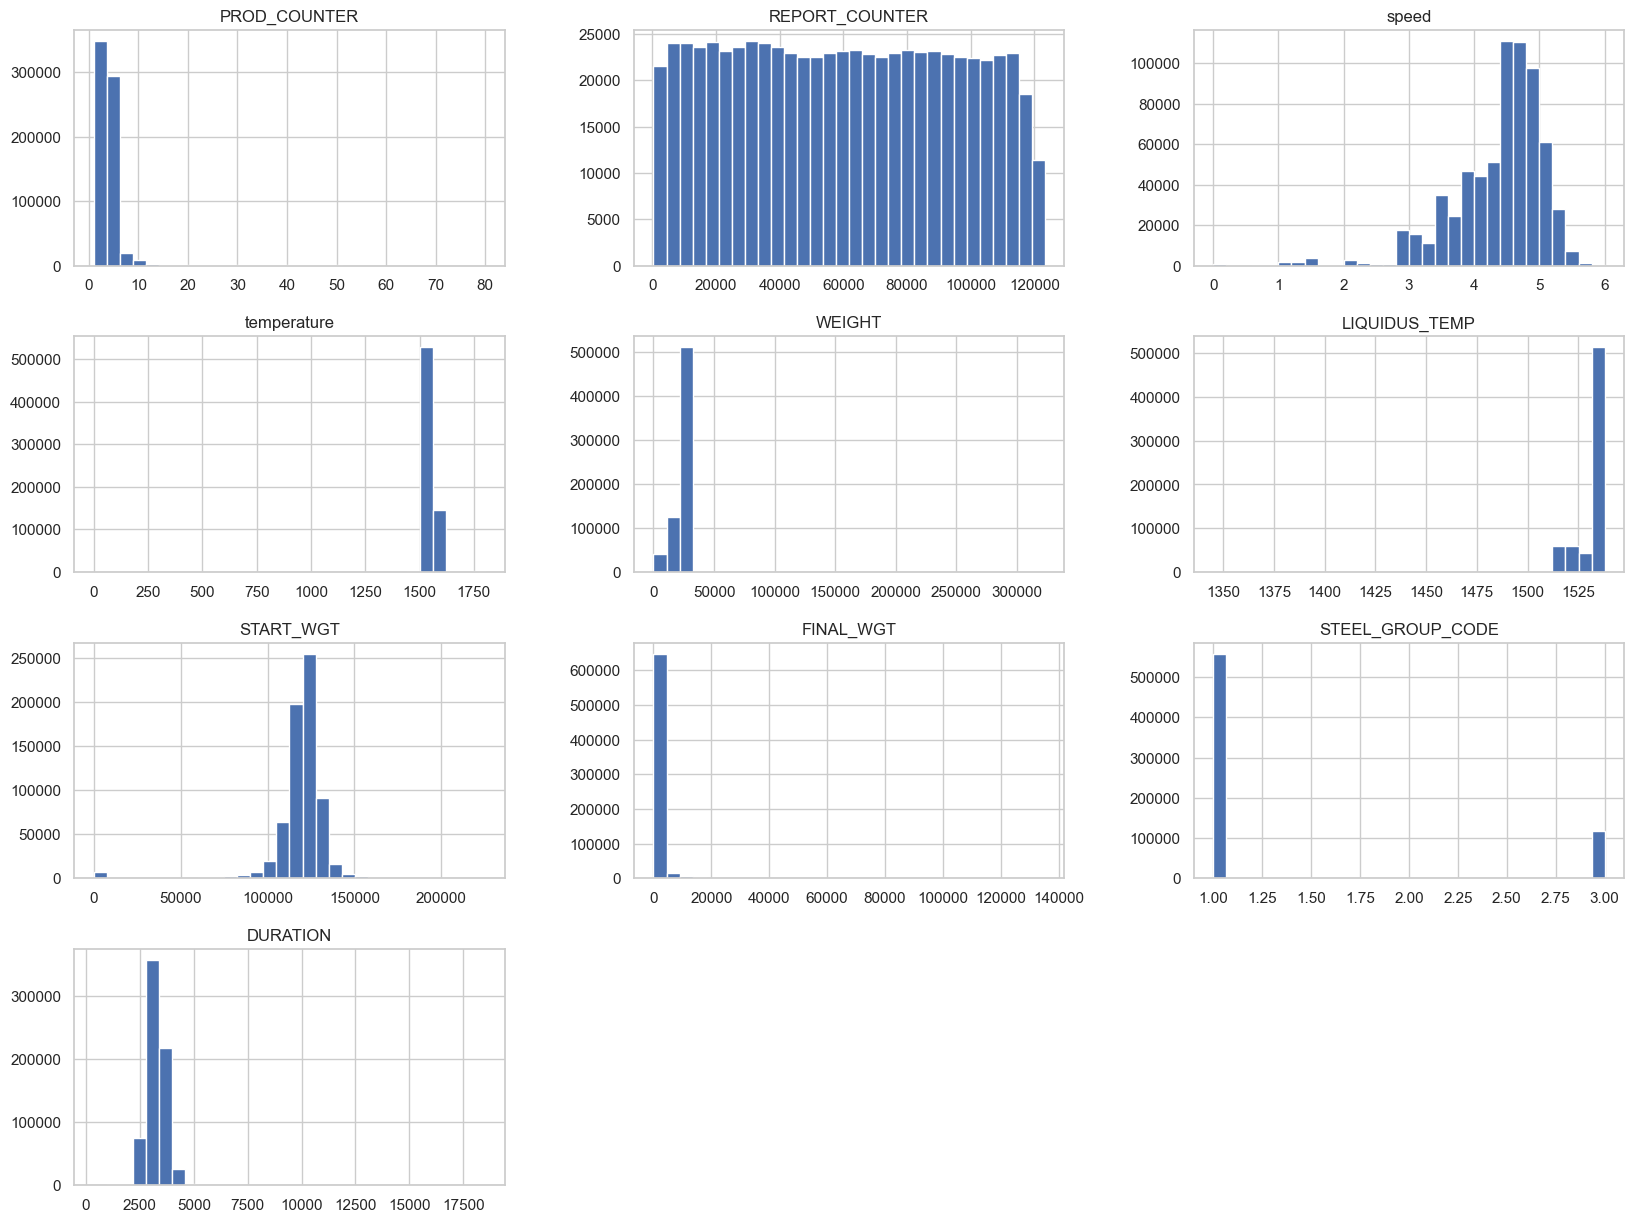

In [17]:
# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

C:\Users\vanmaithanhnhat\AppData\Local\Temp\ipykernel_19476\36389329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['superheat'] = df_filtered['temperature'] - df_filtered['LIQUIDUS_TEMP']


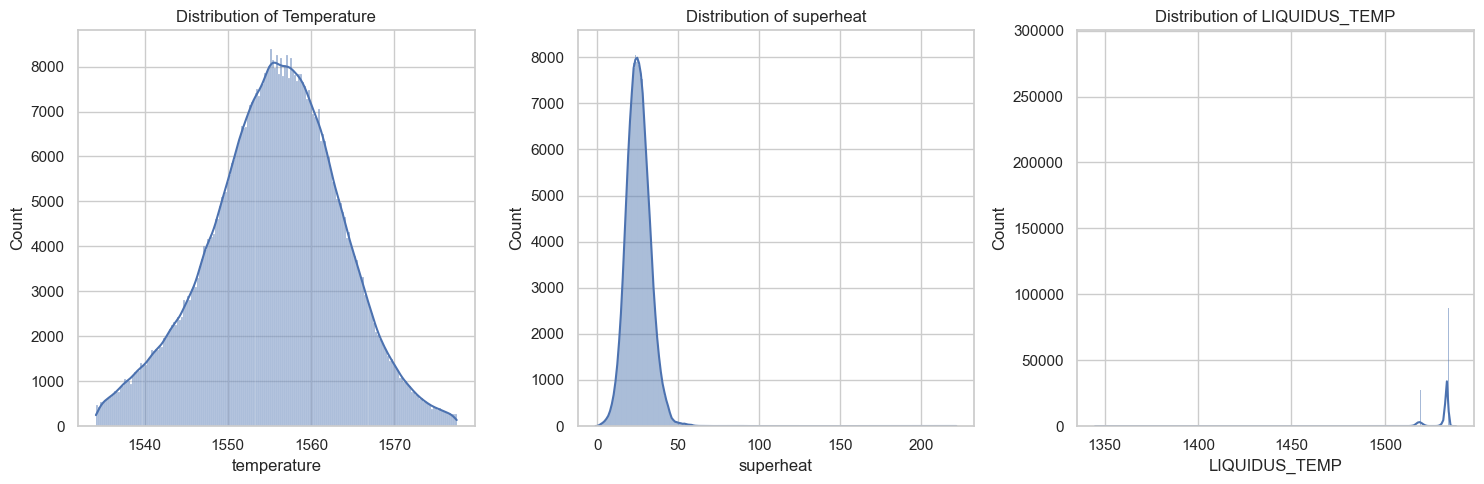

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['temperature', 'speed']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Filter rows that are within the IQR bounds for both columns
df_filtered = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_filtered['superheat'] = df_filtered['temperature'] - df_filtered['LIQUIDUS_TEMP']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_filtered['temperature'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Temperature')

sns.histplot(df_filtered['superheat'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of superheat')

sns.histplot(df_filtered['LIQUIDUS_TEMP'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of LIQUIDUS_TEMP')

plt.tight_layout()
plt.show()

## 3. Categorical Analysis

In [7]:
# Identify object/string columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"--- Distribution of {col} ---")
    print(df[col].value_counts().head(10))
    print("\n")

--- Distribution of SLAB_ID ---
SLAB_ID
121C0080444    77
121C0055082    61
221D0013523    54
222D0044553    53
122C0039374    50
223B0005175    46
121B0007173    45
121C0032731    44
222A0021381    44
122E0012622    44
Name: count, dtype: int64


--- Distribution of LADLE_ID ---
LADLE_ID
4     28533
17    28113
9     27792
21    27080
34    27077
29    26991
3     26915
20    26894
10    26845
6     26806
Name: count, dtype: int64


--- Distribution of HEAT_ID ---
HEAT_ID
21C008044    80
21C005508    75
24B000074    64
23A006731    60
21D001352    58
22D004455    57
22C003937    54
21D010552    53
24A000010    53
21C001308    53
Name: count, dtype: int64


--- Distribution of CUT_DATE ---
CUT_DATE
2022-03-14 01:14:55.000    2
2022-09-07 22:29:41.000    2
2021-06-03 09:47:23.000    2
2022-03-09 21:02:36.000    2
2023-03-08 21:54:31.000    2
2023-07-17 23:07:17.000    2
2021-10-29 04:13:49.000    2
2022-06-07 20:33:04.000    2
2020-10-26 09:08:03.000    2
2021-10-13 03:27:31.000    2
Na

## 4. Time Series Analysis
Plotting Casting Speed and Temperature over time.

In [ ]:
# Convert START_DATE to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Sort by date to ensure proper plotting
df_sorted = df.sort_values('START_DATE')

# Set index for easier plotting if needed, or just use columns
# Plotting a subset if data is too large, or all of it

plt.figure(figsize=(20, 8))

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot Speed
color_speed = 'tab:blue'
ax1.set_xlabel('Time (START_DATE)')
ax1.set_ylabel('Casting Speed (m/min)', color=color_speed)
ax1.plot(df_sorted['START_DATE'], df_sorted['speed'], color=color_speed, linewidth=0.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color_speed)

# Create secondary y-axis for Temperature
ax2 = ax1.twinx()
color_temp = 'tab:red'
ax2.set_ylabel('Temperature (°C)', color=color_temp)
ax2.plot(df_sorted['START_DATE'], df_sorted['temperature'], color=color_temp, linewidth=0.5, alpha=0.5, label='Temperature')
ax2.tick_params(axis='y', labelcolor=color_temp)

plt.title('Casting Speed and Temperature over Time')
plt.show()